In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shai-club/train.csv
/kaggle/input/shai-club/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Get the data

In [3]:
train_data = pd.read_csv("/kaggle/input/shai-club/train.csv")
test_set = pd.read_csv("/kaggle/input/shai-club/test.csv")

# discover the data

In [4]:
train_data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
test_set.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
train_data["cut"].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [8]:
train_data["color"].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [9]:
train_data["clarity"].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [10]:
train_data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data visualization

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

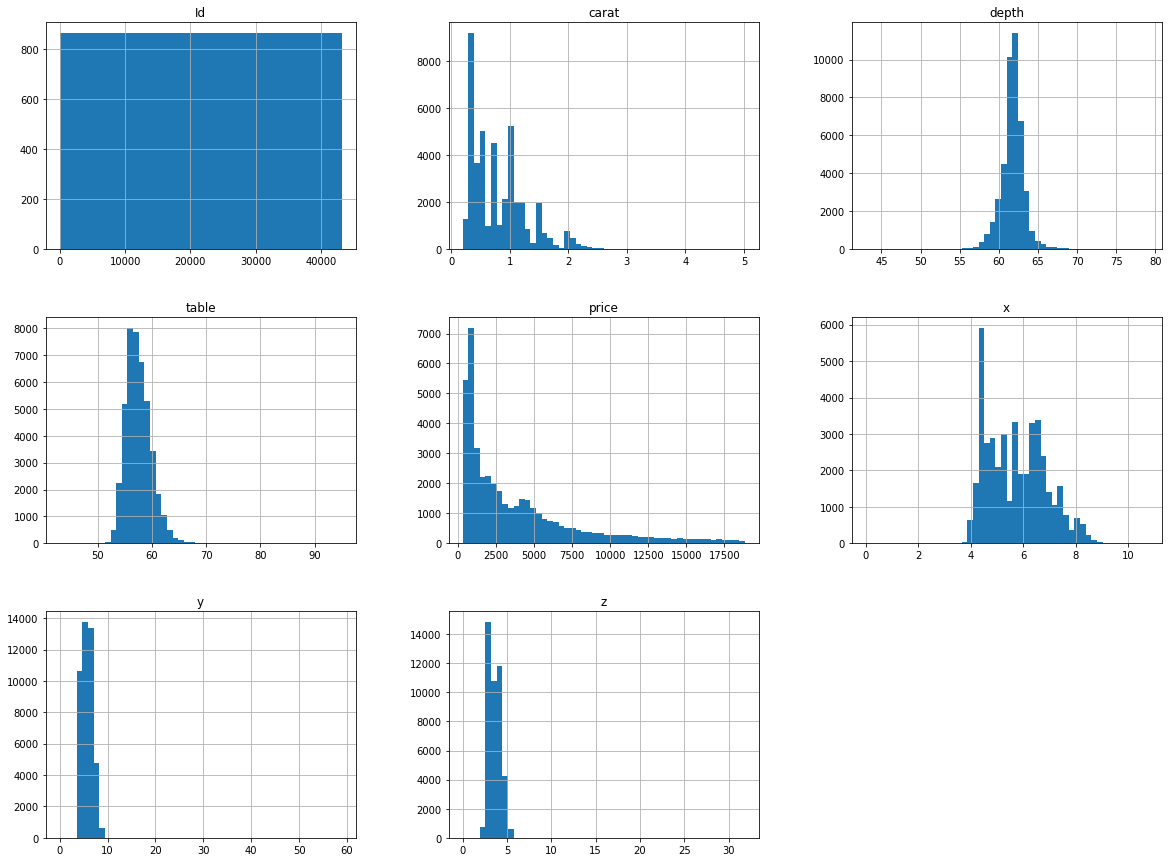

In [11]:
train_data.hist(bins=50,figsize=(20,15))

# Correlation


In [12]:
corr_matrix = train_data.corr()
corr_matrix['price'].sort_values(ascending = False)

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

# Data preperation

In [13]:
is_x_0 = train_data['x']==0
print(train_data[is_x_0].head())

          Id  carat        cut color clarity  depth  table  price    x     y  \
1221    1222   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.00   
6765    6766   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00   
22171  22172   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.00   
24901  24902   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.00   
39201  39202   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0  6.62   

         z  
1221   0.0  
6765   0.0  
22171  0.0  
24901  0.0  
39201  0.0  


In [14]:
train_data.drop(train_data[train_data['x']==0].index,inplace=True)
train_data.drop(train_data[train_data['y']==0].index,inplace=True)
train_data.drop(train_data[train_data['z']==0].index,inplace=True)

In [15]:
train_data["volume"]=train_data["x"]*train_data["y"]*train_data["z"]
test_set['volume']=test_set["x"]*test_set["y"]*test_set["z"]

In [16]:
t_s=train_data.drop('x',axis=1)
t_s1=t_s.drop('y',axis=1)
train_set=t_s1.drop('z',axis=1)
te_s=test_set.drop('x',axis=1)
test = te_s.drop('y',axis=1)
test_set=test.drop('z',axis=1)

In [17]:
train_set.head()

,Id,carat,cut,color,clarity,depth,table,price,volume
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,176.483340
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,246.965796
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,52.943373
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,86.422842
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,115.315200


In [18]:
test_set.head()

,Id,carat,cut,color,clarity,depth,table,volume
0,1,0.34,Ideal,G,VVS2,61.1,57.0,55.686400
1,2,0.71,Premium,E,VS2,62.7,58.0,116.719456
2,3,0.44,Very Good,I,VS1,62.8,56.0,71.889720
3,4,0.81,Premium,E,SI2,60.1,59.0,134.037855
4,5,0.40,Ideal,G,VVS1,61.2,56.0,66.435840


In [19]:
train_set1 = train_set.drop('price',axis = 1)
train_set_labels = train_set['price'].copy()

# Handling Text and Categorical Attributes

In [20]:
train_set_cat = train_set1[['cut','color','clarity']]

In [21]:
test_set_cat = test_set[['cut','color','clarity']]

In [22]:
from sklearn.preprocessing import OrdinalEncoder
ordi = OrdinalEncoder()
ordi_train_set_cat = ordi.fit_transform(train_set_cat)

In [23]:
ordi_test_set_cat = ordi.fit_transform(test_set_cat)

In [24]:
ordi_train_set_cat.shape

(43135, 3)

In [25]:
ordi_test_set_cat.shape

(10788, 3)

In [26]:
#ohe_train_set_cat_arr= ohe_train_set_cat.toarray()

In [27]:
#ohe_test_set_cat_arr= ohe_test_set_cat.toarray()

In [28]:
df_ordi_train_set_cat = pd.DataFrame(ordi_train_set_cat)

In [29]:
df_ordi_test_set_cat = pd.DataFrame(ordi_test_set_cat)

In [30]:
df_ordi_train_set_cat.head()

,0,1,2
0,2.0,5.0,3.0
1,3.0,3.0,7.0
2,2.0,2.0,5.0
3,2.0,3.0,5.0
4,3.0,4.0,7.0


In [31]:
df_ordi_test_set_cat.head()


,0,1,2
0,2.0,3.0,7.0
1,3.0,1.0,5.0
2,4.0,5.0,4.0
3,3.0,1.0,3.0
4,2.0,3.0,6.0


In [32]:
train_set1.drop('cut',axis = 1,inplace = True)
train_set1.drop('color',axis=1,inplace=True)
train_set1.drop('clarity',axis = 1,inplace = True)
test_set.drop('cut',axis=1,inplace=True)
test_set.drop('color',axis=1,inplace=True)
test_set.drop('clarity',axis = 1,inplace = True)

In [33]:
train_set1.index = np.arange(0,43135)
test_set.index = np.arange(0,10788)

In [34]:
train_set_full = train_set1.join(df_ordi_train_set_cat)
test_set_full = test_set.join(df_ordi_test_set_cat)

In [35]:
train_set_full.head()

,Id,carat,depth,table,volume,0,1,2
0,1,1.06,61.8,57.0,176.483340,2.0,5.0,3.0
1,2,1.51,60.9,58.0,246.965796,3.0,3.0,7.0
2,3,0.32,61.3,56.0,52.943373,2.0,2.0,5.0
3,4,0.53,61.2,56.0,86.422842,2.0,3.0,5.0
4,5,0.70,61.0,57.0,115.315200,3.0,4.0,7.0


In [36]:
test_set_full.head()

,Id,carat,depth,table,volume,0,1,2
0,1,0.34,61.1,57.0,55.686400,2.0,3.0,7.0
1,2,0.71,62.7,58.0,116.719456,3.0,1.0,5.0
2,3,0.44,62.8,56.0,71.889720,4.0,5.0,4.0
3,4,0.81,60.1,59.0,134.037855,3.0,1.0,3.0
4,5,0.40,61.2,56.0,66.435840,2.0,3.0,6.0


In [37]:
train_Id = train_set1["Id"]
test_Id = test_set["Id"]

In [38]:
train_set_full.drop('Id',axis = 1,inplace = True)
test_set_full.drop('Id',axis = 1,inplace = True)

# Training the Model

In [39]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
train_set_full1=rs.fit_transform(train_set_full)
test_set_full1=rs.transform(test_set_full)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [40]:
from sklearn.ensemble import IsolationForest
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(train_set_full)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


IsolationForest(contamination=0.2,
                random_state=RandomState(MT19937) at 0x7F0214E1ED10)

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set_full1,train_set_labels)

LinearRegression()

In [42]:
from sklearn.metrics import mean_squared_error
dimonds_predictions = lin_reg.predict(train_set_full1)
lin_mse = mean_squared_error(train_set_labels, dimonds_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1373.9856796442111


**Validation**

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, train_set_full1, train_set_labels, scoring ="neg_mean_squared_error",cv = 10)
lin_rmse_scores = np.sqrt(-scores)

In [44]:
print("Scores: ", lin_rmse_scores)
print("Mean: ", lin_rmse_scores.mean())
print("Standard Deviation: ", lin_rmse_scores.std())

Scores:  [1381.85720632 1362.99165589 1407.05814161 1342.64506842 1413.43588605
 1347.29161019 1392.45474469 1343.958372   1491.09346226 1375.3759353 ]
Mean:  1385.816208274497
Standard Deviation:  42.52886116913557


In [45]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_full1,train_set_labels)

DecisionTreeRegressor()

In [46]:
dimonds_predictions = tree_reg.predict(train_set_full1)
tree_mse = mean_squared_error(train_set_labels, dimonds_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

33.88156555599708


In [47]:
scores = cross_val_score(tree_reg, train_set_full1, train_set_labels, scoring ="neg_mean_squared_error",cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
print("Scores: ", tree_rmse_scores)
print("Mean: ", tree_rmse_scores.mean())
print("Standard Deviation: ", tree_rmse_scores.std())

Scores:  [777.06349894 743.90702928 778.35919147 742.48178922 710.59399453
 690.8538703  722.65023377 726.56699571 731.17280432 761.91658881]
Mean:  738.5565996337924
Standard Deviation:  26.768436816344636


In [49]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_set_full1,train_set_labels)
dimonds_predictions = forest_reg.predict(train_set_full1)
forest_mse = mean_squared_error(train_set_labels, dimonds_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
forest_scores = cross_val_score(forest_reg,train_set_full1, train_set_labels,scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [50]:
print("Scores: ", forest_rmse_scores)
print("Mean: ", forest_rmse_scores.mean())
print("Standard Deviation: ", forest_rmse_scores.std())

Scores:  [588.23788191 557.12555156 567.78077599 535.00995218 555.93676704
 539.75814636 546.10567129 533.06598112 524.36283663 580.07737717]
Mean:  552.7460941252575
Standard Deviation:  19.955792692893485


In [51]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(train_set_full1,train_set_labels)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [52]:
dimonds_predictions = xgb_reg.predict(train_set_full1)
xgb_mse = mean_squared_error(train_set_labels, dimonds_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse)

388.31668439112633


In [53]:
scores = cross_val_score(xgb_reg, train_set_full1, train_set_labels, scoring ="neg_mean_squared_error",cv = 10)
xgb_rmse_scores = np.sqrt(-scores)

In [54]:
print("Scores: ", xgb_rmse_scores)
print("Mean: ", xgb_rmse_scores.mean())
print("Standard Deviation: ", xgb_rmse_scores.std())

Scores:  [582.40021257 531.07158496 574.93276327 527.2661322  535.34044382
 528.86401227 533.56065654 503.92851055 528.74009036 576.75519445]
Mean:  542.2859600979318
Standard Deviation:  24.84704588178149


In [55]:
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor()
cat_reg.fit(train_set_full1,train_set_labels)

Learning rate set to 0.074213
0:	learn: 3724.5523910	total: 63ms	remaining: 1m 2s
1:	learn: 3491.6636327	total: 68.9ms	remaining: 34.4s
2:	learn: 3265.2955143	total: 75.8ms	remaining: 25.2s
3:	learn: 3061.9475482	total: 84.1ms	remaining: 20.9s
4:	learn: 2873.9501515	total: 90.8ms	remaining: 18.1s
5:	learn: 2700.5522582	total: 97.3ms	remaining: 16.1s
6:	learn: 2540.5727459	total: 103ms	remaining: 14.7s
7:	learn: 2396.0778533	total: 110ms	remaining: 13.6s
8:	learn: 2265.8484566	total: 116ms	remaining: 12.8s
9:	learn: 2139.9341107	total: 123ms	remaining: 12.1s
10:	learn: 2026.0642939	total: 128ms	remaining: 11.5s
11:	learn: 1918.6679209	total: 135ms	remaining: 11.1s
12:	learn: 1818.6747274	total: 141ms	remaining: 10.7s
13:	learn: 1729.5014473	total: 146ms	remaining: 10.3s
14:	learn: 1645.2956955	total: 152ms	remaining: 9.95s
15:	learn: 1568.4556618	total: 157ms	remaining: 9.68s
16:	learn: 1497.2679595	total: 164ms	remaining: 9.46s
17:	learn: 1433.0790114	total: 170ms	remaining: 9.25s
18:	

In [56]:
dimonds_predictions = cat_reg.predict(train_set_full1)
cat_mse = mean_squared_error(train_set_labels, dimonds_predictions)
cat_rmse = np.sqrt(cat_mse)
print(cat_rmse)

454.45065705177905


In [57]:
scores = cross_val_score(cat_reg, train_set_full1, train_set_labels, scoring ="neg_mean_squared_error",cv = 10)
cat_rmse_scores = np.sqrt(-scores)

Learning rate set to 0.072988
0:	learn: 3716.7812041	total: 7.68ms	remaining: 7.67s
1:	learn: 3488.2066196	total: 13.1ms	remaining: 6.52s
2:	learn: 3265.8152373	total: 18.5ms	remaining: 6.14s
3:	learn: 3065.7388020	total: 23.8ms	remaining: 5.92s
4:	learn: 2880.3281518	total: 29.3ms	remaining: 5.83s
5:	learn: 2714.1759916	total: 34.2ms	remaining: 5.66s
6:	learn: 2553.5643979	total: 39.3ms	remaining: 5.57s
7:	learn: 2405.5795904	total: 44.5ms	remaining: 5.52s
8:	learn: 2276.4759498	total: 49.5ms	remaining: 5.45s
9:	learn: 2151.0895256	total: 55ms	remaining: 5.44s
10:	learn: 2037.7644999	total: 59.9ms	remaining: 5.38s
11:	learn: 1931.9928374	total: 65ms	remaining: 5.35s
12:	learn: 1834.5058377	total: 70.3ms	remaining: 5.33s
13:	learn: 1742.4922974	total: 75.4ms	remaining: 5.31s
14:	learn: 1659.6495481	total: 80.4ms	remaining: 5.28s
15:	learn: 1584.8771562	total: 85.5ms	remaining: 5.26s
16:	learn: 1515.8477176	total: 91ms	remaining: 5.26s
17:	learn: 1452.8909449	total: 96.3ms	remaining: 5.

In [58]:
print("Scores: ", cat_rmse_scores)
print("Mean: ", cat_rmse_scores.mean())
print("Standard Deviation: ", cat_rmse_scores.std())

Scores:  [567.51023005 505.05762147 561.20741311 509.40779331 529.03590894
 523.80467289 526.81510901 499.30094826 510.44222699 549.36285256]
Mean:  528.1944776584821
Standard Deviation:  22.67993718605746


In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }

In [61]:
grid_search = GridSearchCV(estimator=cat_reg, param_grid = parameters, cv = 2, n_jobs=-1)
grid_search.fit(train_set_full1, train_set_labels)
grid_search.best_params_

0:	learn: 3927.8928126	total: 106ms	remaining: 957ms
1:	learn: 3894.8491964	total: 134ms	remaining: 535ms
2:	learn: 3862.8423108	total: 149ms	remaining: 348ms
3:	learn: 3830.6274627	total: 160ms	remaining: 240ms
4:	learn: 3798.6625927	total: 169ms	remaining: 169ms
5:	learn: 3766.7201505	total: 177ms	remaining: 118ms
6:	learn: 3735.1381741	total: 187ms	remaining: 80.3ms
7:	learn: 3704.6408332	total: 198ms	remaining: 49.5ms
8:	learn: 3674.1565613	total: 208ms	remaining: 23.1ms
9:	learn: 3644.0273693	total: 215ms	remaining: 0us
0:	learn: 3827.6332863	total: 23ms	remaining: 207ms
1:	learn: 3700.1935371	total: 45.4ms	remaining: 182ms
2:	learn: 3580.9281564	total: 66.2ms	remaining: 154ms
3:	learn: 3464.1767252	total: 73ms	remaining: 110ms
4:	learn: 3352.5558671	total: 95.1ms	remaining: 95.1ms
5:	learn: 3244.9116738	total: 113ms	remaining: 75.4ms
6:	learn: 3146.3895533	total: 126ms	remaining: 53.9ms
7:	learn: 3051.2426918	total: 154ms	remaining: 38.4ms
8:	learn: 2957.6846754	total: 158ms	rema

{'depth': 10, 'iterations': 100, 'learning_rate': 0.04}

In [62]:
grid_search.best_estimator_

In [63]:
final_model = grid_search.best_estimator_

In [64]:
predictions = pd.Series(final_model.predict(test_set_full1))

In [65]:
pred = pd.DataFrame({"Id":test_Id,"price":predictions})
pred.head()

,Id,price
0,1,900.086476
1,2,2985.326367
2,3,987.772244
3,4,2814.135284
4,5,1124.608852


In [66]:
pred.to_csv("submission.csv",index=False)